# Exploring Dandiset 000617: Allen Institute Openscope - Sequence Learning Project

Version: 0.250312.0130

**Disclaimer:** This notebook was AI-generated and has not been fully verified. Please be cautious when interpreting the code or results.

## Overview of the Dandiset

This Dandiset, titled "Allen Institute Openscope - Sequence Learning Project", focuses on understanding predictive computations in the neocortex using two-photon calcium imaging in mice. The experiments involve presenting sequences of natural movie clips to head-fixed mice and recording neural activity in different cortical areas (V1, LM, AM, PM) and layers (L2/3, L4).

The core idea is to investigate how the brain learns to predict upcoming stimuli in a sequence. The experimental design includes:
1. A baseline session with random presentation of movie clips (A, B, C) and a grey screen (X).
2. Three training sessions where movie clips are presented in a repeating sequence (ABCABC...).
3. A final session with random presentation to assess changes due to learning.

More information can be found on the DANDI archive: [https://dandiarchive.org/dandiset/000617/0.250312.0130](https://dandiarchive.org/dandiset/000617/0.250312.0130)

The Dandiset contains processed neurophysiology data in NWB format, including fluorescence traces, dF/F, detected events, and stimulus information.

## What this notebook covers

This notebook will guide you through:
1. Listing required Python packages.
2. Loading the Dandiset metadata using the DANDI API.
3. Listing some assets (NWB files) within the Dandiset.
4. Loading a specific NWB file from the Dandiset.
5. Exploring the structure and metadata of the NWB file.
6. Visualizing some of the data, such as fluorescence traces and image masks.
7. Summarizing findings and suggesting potential future directions.

## Required Packages

To run this notebook, you will need the following Python packages. This notebook assumes they are already installed.

* `dandi` (for interacting with the DANDI Archive)
* `pynwb` (for working with NWB files)
* `h5py` (as a backend for pynwb to read HDF5 files)
* `remfile` (for streaming remote files)
* `numpy` (for numerical operations)
* `matplotlib` (for plotting)
* `pandas` (for data manipulation and display, optional but recommended)
* `seaborn` (for enhanced visualizations)

You do not need to install these packages if you are running this notebook in an environment where they are already available.

## Loading the Dandiset using the DANDI API

In [1]:
from itertools import islice
from dandi.dandiapi import DandiAPIClient
import numpy as np
import matplotlib.pyplot as plt
import pynwb
import h5py
import remfile
import pandas as pd
import seaborn as sns

# Set seaborn style for plots (except for images)
sns.set_theme()

# Connect to DANDI archive
client = DandiAPIClient()
dandiset_id = "000617"
dandiset_version = "0.250312.0130"
dandiset = client.get_dandiset(dandiset_id, dandiset_version)

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")
print(f"Dandiset description: {metadata.get('description', 'No description provided.')}")

# List some assets in the Dandiset
assets = dandiset.get_assets()
print("\nFirst 5 assets:")
for asset in islice(assets, 5):
    print(f"- {asset.path} (ID: {asset.identifier}, Size: {asset.size} bytes)")

Dandiset name: Allen Institute Openscope - Sequence Learning Project
Dandiset URL: https://dandiarchive.org/dandiset/000617/0.250312.0130
Dandiset description: Adaptive and coordinated behavior requires that an animal be able to make predictions about the near and even far future. This intuition that some neural computations should be ‘predictive’ in their character has a long history, starting with ideas about how the receptive field structure of retinal ganglion cells relate to the statistics of natural visual scenes. Ideas about predictive computation have been most influential in thinking about the function of the neocortex. Here, the relatively stereotyped local circuitry of the neocortex has long led to speculation that each local circuit might be carrying out a somewhat similar, fundamental computation on its specific inputs. In addition, the organization of sensory-motor pathways into hierarchies (e.g., V1, V2, V4, IT in the ventral visual stream) with stereotyped feedforward a

## Loading an NWB File

We will now load one of the NWB files from the Dandiset to explore its contents. We'll select the file `sub-677038/sub-677038_ses-1280089433-acq-1280384858_ophys.nwb`.

The URL for this asset is constructed using its asset ID: `27dd7936-b3e7-45af-aca0-dc98b5954d19`.

In [2]:
# Asset details
asset_path_to_load = "sub-677038/sub-677038_ses-1280089433-acq-1280384858_ophys.nwb"
asset_id_to_load = "27dd7936-b3e7-45af-aca0-dc98b5954d19" # From the asset listing above
nwb_file_url = f"https://api.dandiarchive.org/api/assets/{asset_id_to_load}/download/"

print(f"Loading NWB file: {asset_path_to_load}")
print(f"From URL: {nwb_file_url}")

# Load the NWB file
# This uses the exact loading mechanism shown by `tools_cli.py nwb-file-info`
remote_file = remfile.File(nwb_file_url)
h5_file = h5py.File(remote_file, 'r') # Ensure read-only mode
io = pynwb.NWBHDF5IO(file=h5_file, mode='r') # Ensure read-only mode for pynwb
nwbfile = io.read()

print("\nNWB file loaded successfully.")
print(f"Identifier: {nwbfile.identifier}")
print(f"Session description: {nwbfile.session_description}")
print(f"Session start time: {nwbfile.session_start_time}")

Loading NWB file: sub-677038/sub-677038_ses-1280089433-acq-1280384858_ophys.nwb
From URL: https://api.dandiarchive.org/api/assets/27dd7936-b3e7-45af-aca0-dc98b5954d19/download/



NWB file loaded successfully.
Identifier: 1280384858
Session description: Ophys Session
Session start time: 2023-06-30 16:04:51.055000+00:00


### Explore the NWB file with Neurosift

You can explore this NWB file interactively using Neurosift:
[https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/27dd7936-b3e7-45af-aca0-dc98b5954d19/download/&dandisetId=000617&dandisetVersion=draft](https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/27dd7936-b3e7-45af-aca0-dc98b5954d19/download/&dandisetId=000617&dandisetVersion=draft)

*(Note: The link uses `dandisetVersion=draft` as Neurosift typically points to the latest draft version for exploration. The data content should be the same for the specified asset ID).*

## Summarizing NWB File Contents

Let's look at some of the key data structures within the loaded NWB file.

### General Information

In [3]:
print(f"NWB File Identifier: {nwbfile.identifier}")
print(f"Session Description: {nwbfile.session_description}")
print(f"Session Start Time: {nwbfile.session_start_time}")
print(f"Institution: {nwbfile.institution}")
if nwbfile.subject:
    print(f"Subject ID: {nwbfile.subject.subject_id}")
    print(f"Subject Age: {nwbfile.subject.age}")
    print(f"Subject Genotype: {nwbfile.subject.genotype}")
    print(f"Subject Sex: {nwbfile.subject.sex}")
    print(f"Subject Species: {nwbfile.subject.species}")
if nwbfile.lab_meta_data and 'metadata' in nwbfile.lab_meta_data:
    metadata_lab = nwbfile.lab_meta_data['metadata']
    print(f"Ophys Experiment ID: {metadata_lab.ophys_experiment_id}")
    print(f"Imaging Depth: {metadata_lab.imaging_depth} um")

NWB File Identifier: 1280384858
Session Description: Ophys Session
Session Start Time: 2023-06-30 16:04:51.055000+00:00
Institution: Allen Institute for Brain Science
Subject ID: 677038
Subject Age: P92.0D
Subject Genotype: Cux2-CreERT2/wt;Camk2a-tTA/wt;Ai93(TITL-GCaMP6f)/wt
Subject Sex: F
Subject Species: Mus musculus
Ophys Experiment ID: 1280384858
Imaging Depth: 175 um


### Acquisition Data

The `acquisition` group often contains raw acquired data, like stimulus signals or behavioral data.

Available data in nwbfile.acquisition:
- v_in: <class 'pynwb.base.TimeSeries'>
  Description: The theoretical maximum voltage that the running wheel encoder will reach prior to "wrapping". This should theoretically be 5V (after crossing 5V goes to 0V, or vice versa). In practice the encoder does not always reach this value before wrapping, which can cause transient spikes in speed at the voltage "wraps".
  Data shape: (252000,)
  Timestamps shape: (252000,)
- v_sig: <class 'pynwb.base.TimeSeries'>
  Description: Voltage signal from the running wheel encoder
  Data shape: (252000,)
  Timestamps shape: (252000,)


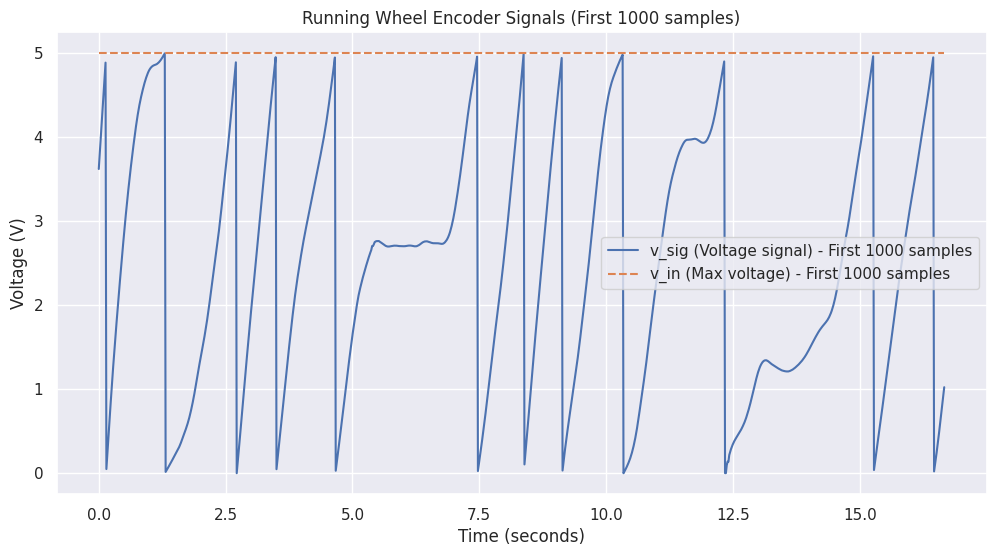

In [4]:
print("Available data in nwbfile.acquisition:")
for acq_name, acq_data in nwbfile.acquisition.items():
    print(f"- {acq_name}: {type(acq_data)}")
    if hasattr(acq_data, 'description'):
        print(f"  Description: {acq_data.description}")
    if hasattr(acq_data, 'data') and hasattr(acq_data.data, 'shape'):
         print(f"  Data shape: {acq_data.data.shape}")
    if hasattr(acq_data, 'timestamps') and hasattr(acq_data.timestamps, 'shape'):
         print(f"  Timestamps shape: {acq_data.timestamps.shape}")

# Let's plot a small segment of the running wheel signals
if "v_sig" in nwbfile.acquisition and "v_in" in nwbfile.acquisition:
    v_sig_ts = nwbfile.acquisition["v_sig"]
    v_in_ts = nwbfile.acquisition["v_in"]

    # Load a small subset of data to avoid large downloads
    num_samples_to_plot = 1000
    v_sig_data_subset = v_sig_ts.data[:num_samples_to_plot]
    v_sig_timestamps_subset = v_sig_ts.timestamps[:num_samples_to_plot]

    v_in_data_subset = v_in_ts.data[:num_samples_to_plot]
    # Assuming timestamps are the same for v_in if not explicitly different for this short segment
    # v_in_timestamps_subset = v_in_ts.timestamps[:num_samples_to_plot]


    plt.figure(figsize=(12, 6))
    plt.plot(v_sig_timestamps_subset, v_sig_data_subset, label=f'v_sig (Voltage signal) - First {num_samples_to_plot} samples')
    plt.plot(v_sig_timestamps_subset, v_in_data_subset, label=f'v_in (Max voltage) - First {num_samples_to_plot} samples', linestyle='--')
    plt.xlabel(f"Time ({v_sig_ts.timestamps_unit})")
    plt.ylabel(f"Voltage ({v_sig_ts.unit})")
    plt.title(f"Running Wheel Encoder Signals (First {num_samples_to_plot} samples)")
    plt.legend()
    plt.show()
else:
    print("Running wheel signals (v_sig, v_in) not found in nwbfile.acquisition.")

### Stimulus Templates

This file contains templates for the stimuli presented.


Available stimulus templates in nwbfile.stimulus_template:
- gray: <class 'pynwb.image.ImageSeries'>
  Data shape: (1280, 720, 120)
  Format: raw
- movie_clip_A: <class 'pynwb.image.ImageSeries'>
  Data shape: (1280, 720, 120)
  Format: raw
- movie_clip_B: <class 'pynwb.image.ImageSeries'>
  Data shape: (1280, 720, 120)
  Format: raw
- movie_clip_C: <class 'pynwb.image.ImageSeries'>
  Data shape: (1280, 720, 120)
  Format: raw
Shape of movie_clip_A data: (1280, 720, 120)


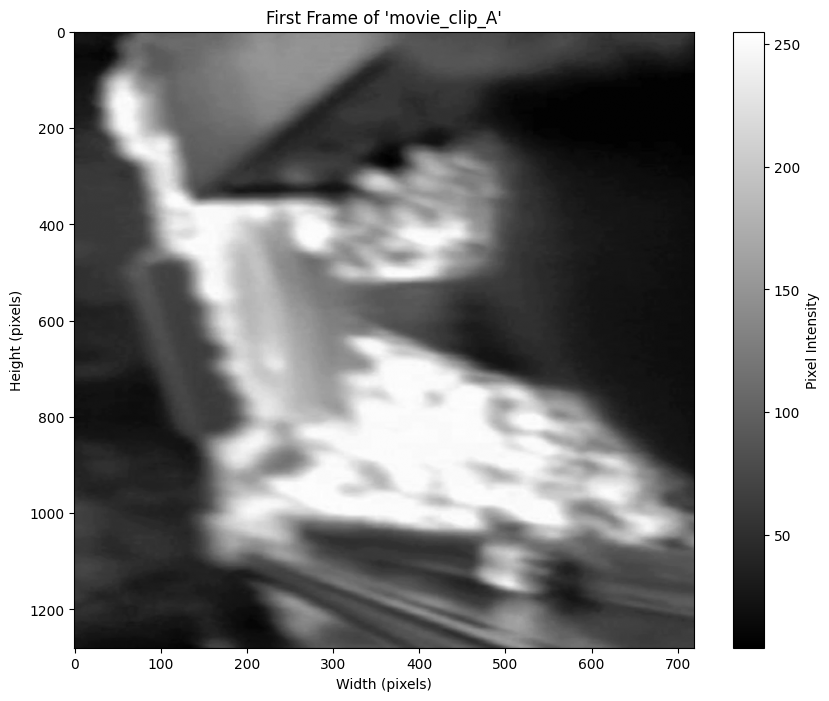

In [5]:
print("\nAvailable stimulus templates in nwbfile.stimulus_template:")
if nwbfile.stimulus_template:
    for name, data in nwbfile.stimulus_template.items():
        print(f"- {name}: {type(data)}")
        if hasattr(data, 'data') and hasattr(data.data, 'shape'):
            print(f"  Data shape: {data.data.shape}")
        if hasattr(data, 'format'):
            print(f"  Format: {data.format}")

    # Let's display a frame from one of the movie clips to show how to access it
    # We'll take one frame from movie_clip_A
    if "movie_clip_A" in nwbfile.stimulus_template:
        movie_A = nwbfile.stimulus_template["movie_clip_A"]
        if hasattr(movie_A, 'data') and len(movie_A.data.shape) == 3: # Assuming (X, Y, Time/Frames)
            # Display the first frame
            # Data is likely (height, width, frame_index) based on typical video formats
            # tools_cli output showed (1280, 720, 120) which might be (height, width, n_frames)
            # or (width, height, n_frames) depending on convention. Matplotlib imshow expects (height, width, [channels])
            # Let's assume tools_cli output (1280, 720, 120) means (height=1280, width=720, 120 frames)
            # but this is unusually tall for a typical movie frame.
            # Let's try to infer or just plot. Typical movie aspect is wider than tall.
            # The output from tools_cli was: movie_clip_A.data # (Dataset) shape (1280, 720, 120); dtype uint8
            # This means 120 frames, each 1280x720. Matplotlib expects (rows, cols_
            # If the data is (1280 rows, 720 columns), it's very tall. If (720 rows, 1280 columns) it's more standard.
            # Let's assume the shape is (frame_index, height, width) or (height, width, frame_index)
            # The nwb-file-info says (1280, 720, 120). Let's assume this is (dim1, dim2, n_frames)
            # and that a single frame is (dim1, dim2).
            print(f"Shape of movie_clip_A data: {movie_A.data.shape}")
            if movie_A.data.shape[2] > 0: # Check if there are frames
                # Taking the first frame movie_A.data[:, :, 0]
                # Be careful with data size.
                # Given the shape, it's (1280, 720, 120). A single frame is movie_A.data[:,:,0]
                # which is 1280x720. This is a large image. Let's try to plot it.
                # No seaborn style for images.
                with plt.style.context('default'):
                    plt.figure(figsize=(10, 8)) # Adjust as needed
                    # Try to plot the first frame.
                    # Data is usually H x W. So data[:, :, 0] means a frame of 1280x720.
                    try:
                        first_frame_A = movie_A.data[:, :, 0]
                        plt.imshow(first_frame_A, cmap='gray', aspect='auto') # Aspect auto might be needed for unusual dimensions
                        plt.title("First Frame of 'movie_clip_A'")
                        plt.xlabel("Width (pixels)")
                        plt.ylabel("Height (pixels)")
                        plt.colorbar(label="Pixel Intensity")
                        plt.show()
                    except Exception as e:
                        print(f"Could not plot movie frame: {e}. Data shape might be an issue for imshow {movie_A.data.shape}.")
            else:
                print("'movie_clip_A' data is empty or has no frames.")
        else:
            print("'movie_clip_A' does not have expected 3D data.")
    else:
        print("'movie_clip_A' not found in stimulus_template.")
else:
    print("No stimulus templates found in this NWB file.")

### Processing Modules (Ophys Data)

The `processing` group typically contains derived data, such as fluorescence traces from Regions of Interest (ROIs).

This file contains an 'ophys' processing module. Let's explore its contents.

Available data interfaces in 'ophys' module:
- corrected_fluorescence: <class 'pynwb.ophys.Fluorescence'>
- dff: <class 'pynwb.ophys.DfOverF'>
- event_detection: <class 'abc.OphysEventDetection'>
- image_segmentation: <class 'pynwb.ophys.ImageSegmentation'>
- images: <class 'pynwb.base.Images'>
- neuropil_trace: <class 'pynwb.ophys.Fluorescence'>
- ophys_motion_correction_x: <class 'pynwb.base.TimeSeries'>
- ophys_motion_correction_y: <class 'pynwb.base.TimeSeries'>

dF/F traces ('traces') found.
  Description: no description
  Data shape (Timepoints x ROIs): (40019, 121)
  Timestamps shape: (40019,)
  Unit: NA


Plotting for ROI IDs: ['-1', '-1', '-1', '-1', '-1']


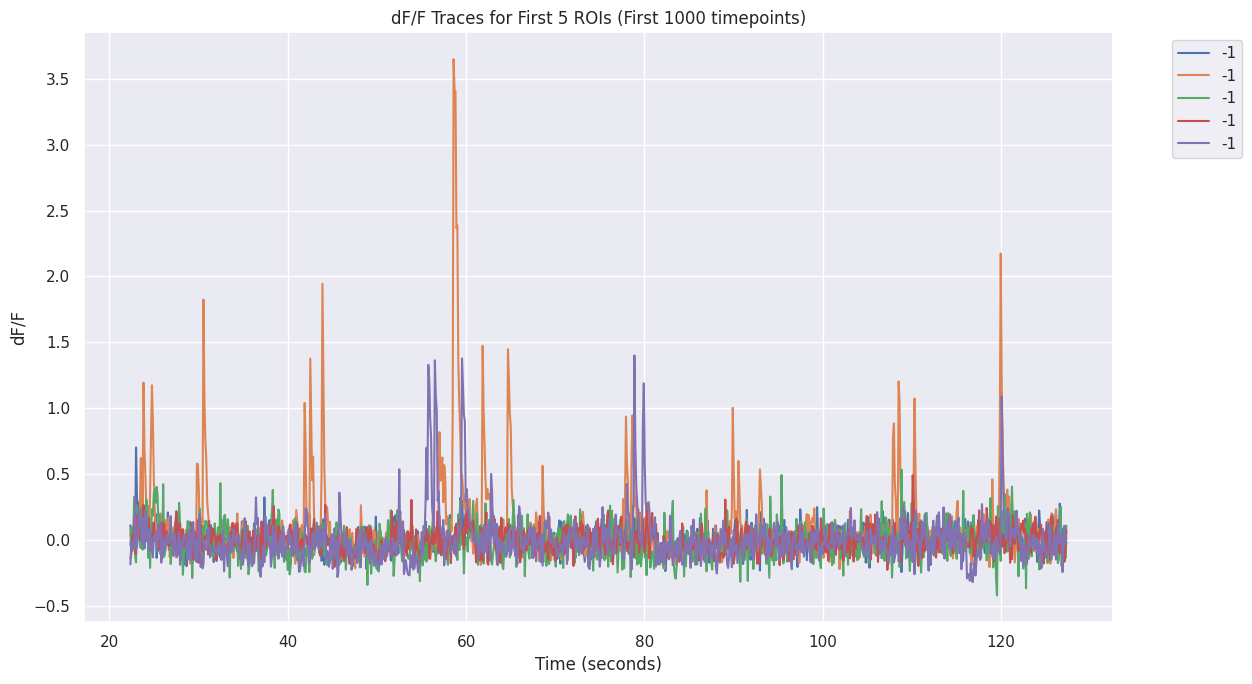


Plane Segmentation table ('cell_specimen_table') found.
  Description: Segmented rois
  Number of ROIs: 121
  Contains 'image_mask' for 121 ROIs.


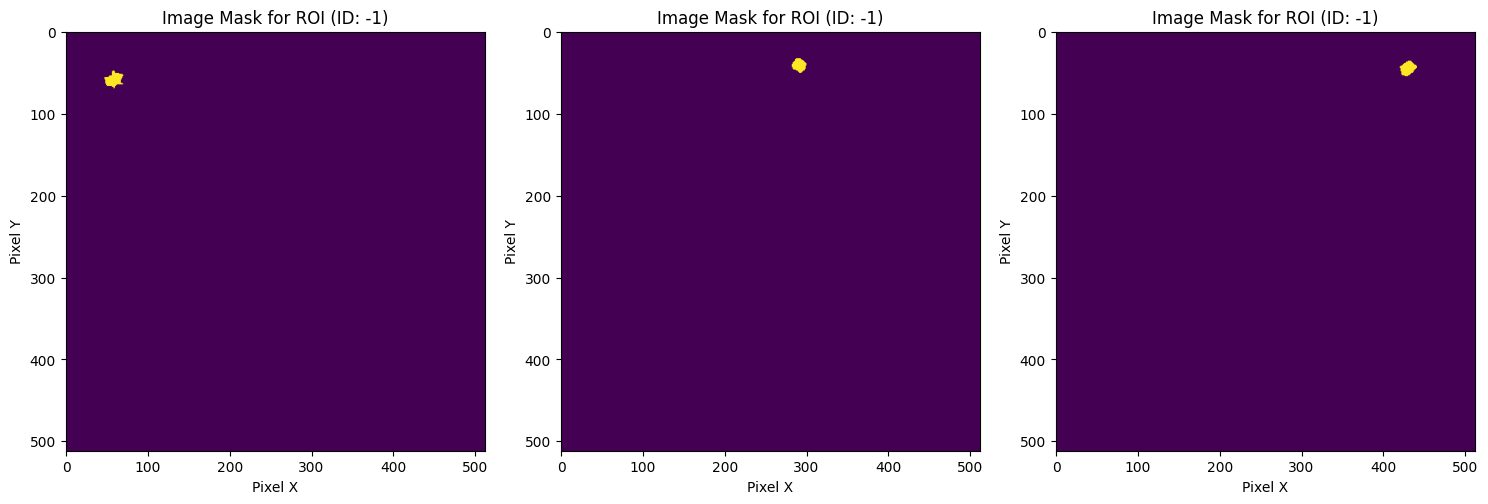

Attempting to create a composite image of ROI masks on a 512x512 canvas.


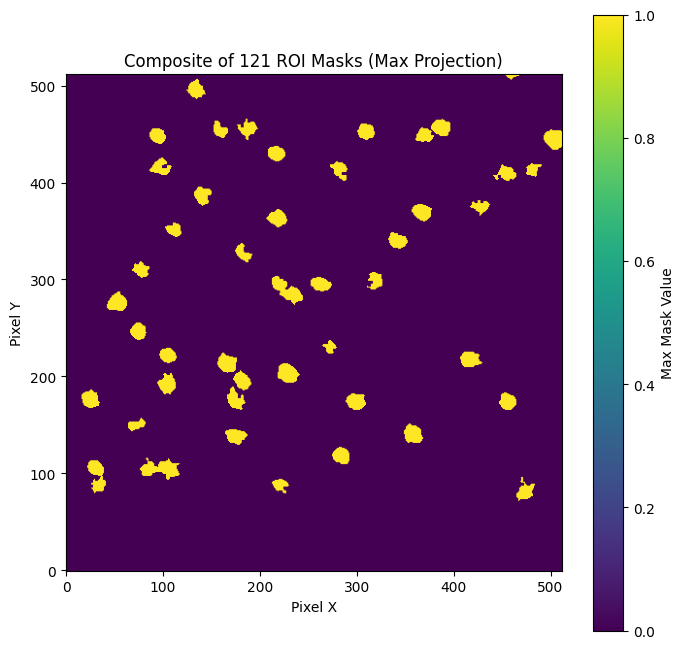


Event Detection data ('event_detection') found.
  Data shape (Timepoints x ROIs): (40019, 121)
  Description: no description
Plotting event raster for ROI IDs: ['-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1']


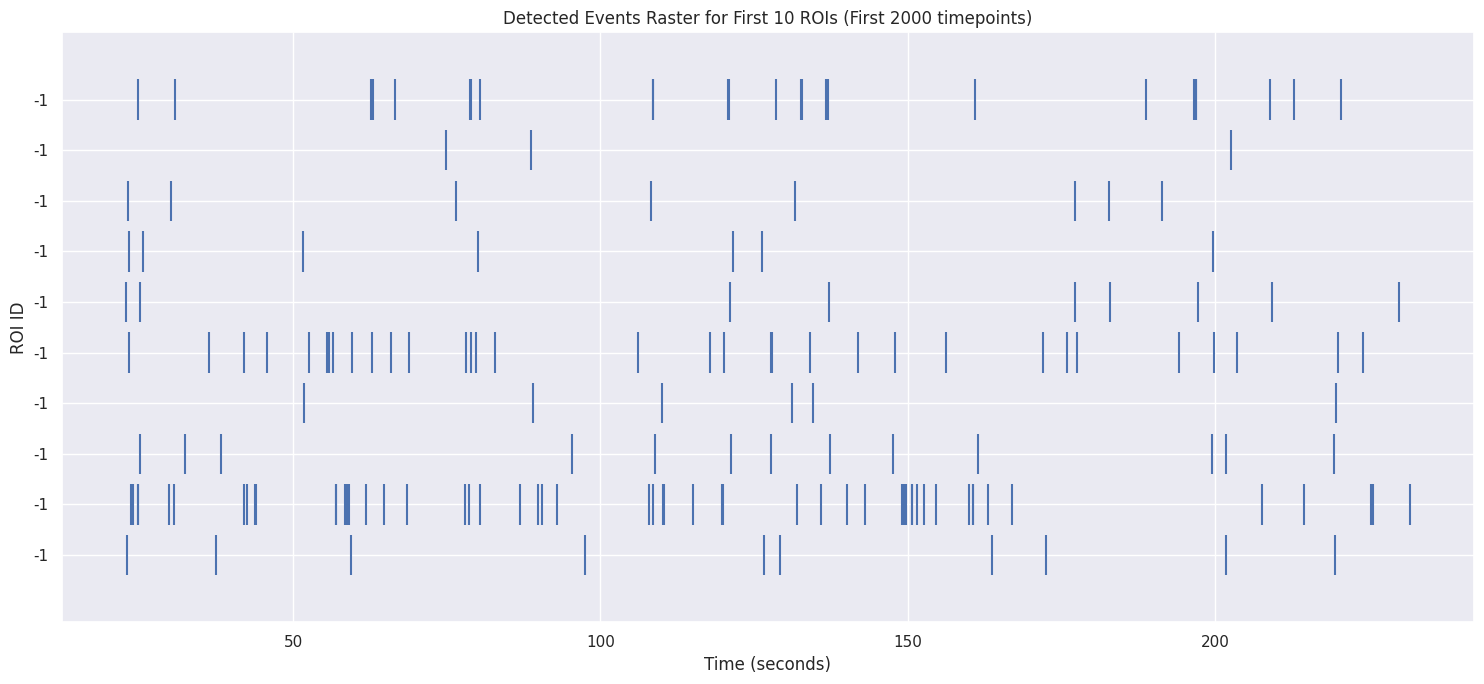

In [6]:
if "ophys" in nwbfile.processing:
    ophys_module = nwbfile.processing["ophys"]
    print("Available data interfaces in 'ophys' module:")
    for name, data_interface in ophys_module.data_interfaces.items():
        print(f"- {name}: {type(data_interface)}")

    # Let's focus on 'dff' (Delta F over F) traces
    if "dff" in ophys_module.data_interfaces:
        dff_interface = ophys_module.data_interfaces["dff"]
        if hasattr(dff_interface, 'roi_response_series'):
            # Typically there's one main RoiResponseSeries, often named 'traces'
            if "traces" in dff_interface.roi_response_series:
                dff_traces = dff_interface.roi_response_series["traces"]
                print(f"\ndF/F traces ('{dff_traces.name}') found.")
                print(f"  Description: {dff_traces.description}")
                print(f"  Data shape (Timepoints x ROIs): {dff_traces.data.shape}")
                print(f"  Timestamps shape: {dff_traces.timestamps.shape}")
                print(f"  Unit: {dff_traces.unit}")

                # timestamps_data = dff_traces.timestamps[:] # Load all timestamps
                # For plotting, let's take a subset of ROIs and timepoints to keep it manageable
                num_rois_to_plot = min(5, dff_traces.data.shape[1])
                num_timepoints_to_plot = min(1000, dff_traces.data.shape[0])

                # Accessing a subset of data directly: data[start_time:end_time, start_roi:end_roi]
                dff_data_subset = dff_traces.data[:num_timepoints_to_plot, :num_rois_to_plot]
                timestamps_subset = dff_traces.timestamps[:num_timepoints_to_plot]
                
                # Get actual ROI IDs if available from the PlaneSegmentation table
                roi_ids = []
                # Check if we can get specific IDs
                can_get_specific_ids = (hasattr(dff_traces, 'rois') and
                                        hasattr(dff_traces.rois, 'table') and
                                        dff_traces.rois.table is not None and # Ensure table exists
                                        'cell_specimen_id' in dff_traces.rois.table.colnames and
                                        hasattr(dff_traces.rois.table, '__getitem__') and # make sure table is indexable
                                        hasattr(dff_traces.rois, 'data') and # Ensure .data attribute exists for DynamicTableRegion
                                        len(dff_traces.rois.data) >= num_rois_to_plot) # Critical check: ensure .rois.data is long enough

                if can_get_specific_ids:
                    roi_table = dff_traces.rois.table
                    # print(f"Attempting to fetch specific IDs for {num_rois_to_plot} ROIs.")
                    for i in range(num_rois_to_plot):
                        try:
                            # dff_traces.rois.data[i] gives an index into roi_table for the i-th ROI in dff_traces.data
                            roi_table_idx = dff_traces.rois.data[i]
                            # Now get the cell_specimen_id from that row in roi_table
                            roi_id_val = roi_table['cell_specimen_id'][roi_table_idx]
                            if isinstance(roi_id_val, bytes):
                                roi_id_val = roi_id_val.decode('utf-8')
                            roi_ids.append(str(roi_id_val))
                        except Exception as e_single_roi:
                            # print(f"Warning: Could not retrieve specific ID for ROI index {i}, using placeholder. Error: {e_single_roi}")
                            roi_ids.append(f"ROI {i} (ID err)") # Append a placeholder to maintain length
                    
                    if len(roi_ids) == num_rois_to_plot:
                         print(f"Plotting for ROI IDs: {roi_ids}")
                    else:
                        # This case indicates a logic flaw or unexpected data structure if reached.
                        # print(f"Warning: roi_ids list length ({len(roi_ids)}) mismatch with num_rois_to_plot ({num_rois_to_plot}). Falling back to generic ROI labels.")
                        roi_ids = [f"ROI {j}_fallback" for j in range(num_rois_to_plot)] # Fallback to ensure correct length

                else: # Fallback if conditions for specific IDs are not met
                    # print("Using generic ROI labels as specific IDs could not be retrieved or prerequisites not met.")
                    roi_ids = [f"ROI {i}_generic" for i in range(num_rois_to_plot)]


                plt.figure(figsize=(15, 7))
                for i in range(num_rois_to_plot):
                    plt.plot(timestamps_subset, dff_data_subset[:, i], label=f'{roi_ids[i]}')
                plt.xlabel(f"Time ({dff_traces.timestamps_unit})")
                plt.ylabel("dF/F")
                plt.title(f"dF/F Traces for First {num_rois_to_plot} ROIs (First {num_timepoints_to_plot} timepoints)")
                plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
                plt.tight_layout(rect=[0,0,0.85,1]) # Adjust layout to make space for legend
                plt.show()

            else:
                print("No 'traces' found in dff_interface.roi_response_series.")
        else:
            print("No 'roi_response_series' found in 'dff' interface.")
    else:
        print("No 'dff' (Delta F over F) interface found in 'ophys' module.")

    # Explore Image Segmentation and Masks
    if "image_segmentation" in ophys_module.data_interfaces:
        img_seg = ophys_module.data_interfaces["image_segmentation"]
        if hasattr(img_seg, 'plane_segmentations'):
            # PlaneSegmentations holds tables of ROIs, one per imaging plane.
            # The example file seems to have one, often named 'cell_specimen_table' or similar
            # The NWB file info showed 'cell_specimen_table'
            if "cell_specimen_table" in img_seg.plane_segmentations:
                plane_seg = img_seg.plane_segmentations["cell_specimen_table"]
                print(f"\nPlane Segmentation table ('{plane_seg.name}') found.")
                print(f"  Description: {plane_seg.description}")
                print(f"  Number of ROIs: {len(plane_seg.id)}") # plane_seg.id gives ElemIdentifiers for ROIs

                if 'image_mask' in plane_seg.colnames:
                    num_rois_total = len(plane_seg.id)
                    print(f"  Contains 'image_mask' for {num_rois_total} ROIs.")
                    
                    # Let's display some ROI masks
                    # plane_seg.image_mask is a VectorData containing all masks
                    # Each element is a 2D array (height x width)
                    # The overall field of view dimensions can be obtained from the imaging plane
                    imaging_plane = plane_seg.imaging_plane
                    # The imaging_plane.description often contains dimensions, e.g., "(512, 512) field of view..."
                    # Or from metadata: metadata.field_of_view_width, metadata.field_of_view_height
                    # Let's infer from one mask shape if possible, or use known info.
                    # The NWB file info showed imaging_plane description: (512, 512) field of view
                    # So, actual_fov_height = 512, actual_fov_width = 512
                    # However, individual masks in image_mask are often smaller local masks.
                    # We would need their x, y offsets from plane_seg columns 'x', 'y' to place them correctly.
                    # For simplicity, let's try to plot a few individual masks.
                    # And then attempt to reconstruct a composite view if feasible.

                    # Let's plot a few individual masks
                    num_masks_to_show = min(3, num_rois_total)
                    # No seaborn style for images
                    with plt.style.context('default'):
                        fig, axes = plt.subplots(1, num_masks_to_show, figsize=(5 * num_masks_to_show, 5))
                        if num_masks_to_show == 1: # handle single subplot case
                            axes = [axes]
                        for i in range(num_masks_to_show):
                            roi_id_val = plane_seg.id[i] # This is usually just the index 0, 1, 2...
                            if 'cell_specimen_id' in plane_seg.colnames:
                                roi_csid_val = plane_seg['cell_specimen_id'][i]
                                if isinstance(roi_csid_val, bytes):
                                     roi_csid_val = roi_csid_val.decode('utf-8')
                                plot_title = f"Image Mask for ROI (ID: {roi_csid_val})"
                            else:
                                plot_title = f"Image Mask for ROI (Index: {roi_id_val})"
                            
                            mask_data = plane_seg['image_mask'][i] # This is one mask
                            axes[i].imshow(mask_data, cmap='viridis') # Viridis is fine for single masks
                            axes[i].set_title(plot_title)
                            axes[i].set_xlabel("Pixel X")
                            axes[i].set_ylabel("Pixel Y")
                        plt.tight_layout()
                        plt.show()

                    # Create a composite image of all masks superimposed
                    # This requires knowing the full FOV dimensions and the x,y offsets of each mask.
                    # `plane_seg.imaging_plane.description` provides " (512, 512) field of view..."
                    # `plane_seg.x` and `plane_seg.y` provide top-left corner.
                    fov_height, fov_width = 512, 512 # From NWB file info
                    composite_mask_image = np.zeros((fov_height, fov_width), dtype=np.float32)

                    print(f"Attempting to create a composite image of ROI masks on a {fov_height}x{fov_width} canvas.")
                    try:
                        all_masks_data = []
                        for i in range(num_rois_total):
                            mask = plane_seg['image_mask'][i]   # shape (h, w)
                            x_offset = int(plane_seg['x'][i])
                            y_offset = int(plane_seg['y'][i])
                            
                            # Add mask to the composite image at its location
                            # Ensure mask fits within boundaries
                            mask_h, mask_w = mask.shape
                            y_end = min(y_offset + mask_h, fov_height)
                            x_end = min(x_offset + mask_w, fov_width)
                            
                            # Slice the mask if it extends beyond FOV (should not happen with correct x,y,h,w)
                            mask_slice_h = y_end - y_offset
                            mask_slice_w = x_end - x_offset

                            if mask_slice_h > 0 and mask_slice_w > 0:
                                # Create a temporary full-size canvas for this mask
                                temp_mask_canvas = np.zeros((fov_height, fov_width), dtype=mask.dtype)
                                temp_mask_canvas[y_offset:y_end, x_offset:x_end] = mask[:mask_slice_h, :mask_slice_w]
                                all_masks_data.append(temp_mask_canvas)
                        
                        if all_masks_data:
                            # Stack all full-size mask canvases and take the max projection
                            stacked_masks = np.stack(all_masks_data, axis=0)
                            composite_mask_image = np.max(stacked_masks, axis=0)

                            # No seaborn style for images
                            with plt.style.context('default'):
                                plt.figure(figsize=(8, 8))
                                plt.imshow(composite_mask_image, cmap='viridis', origin='lower') # Use viridis for better perception of values
                                plt.title(f"Composite of {num_rois_total} ROI Masks (Max Projection)")
                                plt.xlabel("Pixel X")
                                plt.ylabel("Pixel Y")
                                plt.colorbar(label="Max Mask Value")
                                plt.show()
                        else:
                            print("No valid masks found to create a composite image.")

                    except Exception as e:
                        print(f"Could not create composite mask image: {e}")
                        print("This might be due to issues with mask dimensions, offsets, or data types.")

                else:
                    print("  'image_mask' column not found in plane segmentation table.")
            else:
                print("Default 'cell_specimen_table' not found in image_segmentation.plane_segmentations.")
        else:
            print("No 'plane_segmentations' found in 'image_segmentation' interface.")
    else:
        print("No 'image_segmentation' interface found in 'ophys' module.")


    # You can similarly explore other data interfaces like 'corrected_fluorescence', 'event_detection', etc.
    # For example, to access 'event_detection' data (often inferred spikes):
    if 'event_detection' in ophys_module.data_interfaces:
        event_det = ophys_module.data_interfaces['event_detection']
        print(f"\nEvent Detection data ('{event_det.name}') found.")
        # event_det is an OphysEventDetection object, which is an extension of RoiResponseSeries
        print(f"  Data shape (Timepoints x ROIs): {event_det.data.shape}")
        print(f"  Description: {event_det.description if event_det.description else 'N/A'}")
        # This data often represents event occurrences (e.g., binary or amplitude of detected events)
        # Let's plot a raster for a few ROIs if data is not too large
        
        num_rois_event_plot = min(10, event_det.data.shape[1])
        num_timepoints_event_plot = min(2000, event_det.data.shape[0])

        event_data_subset = event_det.data[:num_timepoints_event_plot, :num_rois_event_plot]
        event_timestamps_subset = event_det.timestamps[:num_timepoints_event_plot]

        # Fetch ROI IDs for events
        event_roi_ids = []
        can_get_specific_event_ids = (hasattr(event_det, 'rois') and
                                      hasattr(event_det.rois, 'table') and
                                      event_det.rois.table is not None and
                                      'cell_specimen_id' in event_det.rois.table.colnames and
                                      hasattr(event_det.rois.table, '__getitem__') and
                                      hasattr(event_det.rois, 'data') and
                                      len(event_det.rois.data) >= num_rois_event_plot)

        if can_get_specific_event_ids:
            event_roi_table = event_det.rois.table
            # print(f"Attempting to fetch specific IDs for {num_rois_event_plot} event ROIs.")
            for i in range(num_rois_event_plot):
                try:
                    roi_table_idx = event_det.rois.data[i]
                    roi_id_val = event_roi_table['cell_specimen_id'][roi_table_idx]
                    if isinstance(roi_id_val, bytes):
                        roi_id_val = roi_id_val.decode('utf-8')
                    event_roi_ids.append(str(roi_id_val))
                except Exception as e_single_event_roi:
                    # print(f"Warning: Could not retrieve specific ID for event ROI index {i}, using placeholder. Error: {e_single_event_roi}")
                    event_roi_ids.append(f"ROI {i} (ID err)")
            
            if len(event_roi_ids) == num_rois_event_plot:
                print(f"Plotting event raster for ROI IDs: {event_roi_ids}")
            else:
                # print(f"Warning: event_roi_ids list length ({len(event_roi_ids)}) mismatch. Falling back.")
                event_roi_ids = [f"ROI {j}_fallback" for j in range(num_rois_event_plot)]
        else:
            # print("Using generic ROI labels for events as specific IDs could not be retrieved.")
            event_roi_ids = [f"ROI {i}_generic" for i in range(num_rois_event_plot)]
        
        # For raster, we usually look for non-zero values if data represents event times/amplitudes
        # Matplotlib's eventplot is good for this. It expects a list of lists, where each inner list contains event times for one ROI.
        event_times_per_roi = []
        for i in range(num_rois_event_plot):
            # Assuming event_data_subset[:, i] contains values where non-zero indicates an event
            # For simplicity, let's consider any positive value as an event occurrence at that timestamp
            # This is a simplification; the actual meaning of event_det.data values should be checked.
            # Values might be amplitudes, so thresholding might be needed, or they could be binary.
            # Let's assume positive values are events for this visualization.
            roi_event_indices = np.where(event_data_subset[:, i] > 0)[0] # Get indices of non-zero events
            roi_event_times = event_timestamps_subset[roi_event_indices]
            event_times_per_roi.append(roi_event_times)

        if any(len(times) > 0 for times in event_times_per_roi):
            plt.figure(figsize=(15, 7))
            # Matplotlib eventplot uses y-positions 0, 1, 2... for the lines.
            # Lineoffsets can be used to set the y-value for each ROI.
            # Colors can be set per ROI.
            plt.eventplot(event_times_per_roi, lineoffsets=np.arange(num_rois_event_plot), linelengths=0.8)
            plt.yticks(np.arange(num_rois_event_plot), event_roi_ids[:num_rois_event_plot])
            plt.xlabel(f"Time ({event_det.timestamps_unit})")
            plt.ylabel("ROI ID")
            plt.title(f"Detected Events Raster for First {num_rois_event_plot} ROIs (First {num_timepoints_event_plot} timepoints)")
            plt.tight_layout()
            plt.show()
        else:
            print(f"No events detected (or positive values in data) for the selected subset of ROIs/timepoints for 'event_detection'.")
            
else:
    print("No 'ophys' processing module found in this NWB file.")

### Stimulus Presentation Times

Information about when different stimuli were presented is often stored in `nwbfile.intervals`.

In [7]:
print("\nAvailable stimulus presentation tables in nwbfile.intervals:")
if nwbfile.intervals:
    for interval_name, time_intervals in nwbfile.intervals.items():
        print(f"- {interval_name}: {type(time_intervals)}")
        if hasattr(time_intervals, 'description'):
            print(f"  Description: {time_intervals.description}")
        # Display a few rows if it's a TimeIntervals table and can be converted to DataFrame
        try:
            df_interval = time_intervals.to_dataframe()
            print(f"  Columns: {list(df_interval.columns)}")
            print(f"  First few entries for '{interval_name}':")
            # Use display() for better formatting in Jupyter notebooks if available, else print
            try:
                from IPython.display import display
                display(df_interval.head())
            except ImportError:
                print(df_interval.head().to_string())
        except Exception as e:
            print(f"  Could not convert '{interval_name}' to DataFrame or display head: {e}")
        print("-" * 20)
else:
    print("No interval data found in this NWB file.")


Available stimulus presentation tables in nwbfile.intervals:
- gray_presentations: <class 'pynwb.epoch.TimeIntervals'>
  Description: Presentation times and stimuli details for 'gray' stimuli. 
Note: image_name references control_description in stimulus/templates


  Columns: ['start_time', 'stop_time', 'stimulus_name', 'stimulus_block', 'frame', 'color', 'contrast', 'opacity', 'orientation', 'size', 'units', 'stimulus_index', 'tags', 'timeseries']
  First few entries for 'gray_presentations':


,start_time,stop_time,stimulus_name,stimulus_block,frame,color,contrast,opacity,orientation,size,units,stimulus_index,tags,timeseries
id,,,,,,,,,,,,,,
0,34.918040,34.934720,gray,6.0,0.0,"[1.0, 1.0, 1.0]",1.0,1.0,0.0,"[1920.0, 1080.0]",pix,3.0,[stimulus_time_interval],"[(723, 1, timestamps pynwb.base.TimeSeries at ..."
1,34.934720,34.951401,gray,6.0,1.0,"[1.0, 1.0, 1.0]",1.0,1.0,0.0,"[1920.0, 1080.0]",pix,3.0,[stimulus_time_interval],"[(724, 1, timestamps pynwb.base.TimeSeries at ..."
2,34.951401,34.968082,gray,6.0,2.0,"[1.0, 1.0, 1.0]",1.0,1.0,0.0,"[1920.0, 1080.0]",pix,3.0,[stimulus_time_interval],"[(725, 1, timestamps pynwb.base.TimeSeries at ..."
3,34.968082,34.984762,gray,6.0,3.0,"[1.0, 1.0, 1.0]",1.0,1.0,0.0,"[1920.0, 1080.0]",pix,3.0,[stimulus_time_interval],"[(726, 1, timestamps pynwb.base.TimeSeries at ..."
4,34.984762,35.001443,gray,6.0,4.0,"[1.0, 1.0, 1.0]",1.0,1.0,0.0,"[1920.0, 1080.0]",pix,3.0,[stimulus_time_interval],"[(727, 1, timestamps pynwb.base.TimeSeries at ..."


--------------------
- movie_clip_A_presentations: <class 'pynwb.epoch.TimeIntervals'>
  Description: Presentation times and stimuli details for 'movie_clip_A' stimuli. 
Note: image_name references control_description in stimulus/templates


  Columns: ['start_time', 'stop_time', 'stimulus_name', 'stimulus_block', 'frame', 'color', 'contrast', 'opacity', 'orientation', 'size', 'units', 'stimulus_index', 'tags', 'timeseries']
  First few entries for 'movie_clip_A_presentations':


,start_time,stop_time,stimulus_name,stimulus_block,frame,color,contrast,opacity,orientation,size,units,stimulus_index,tags,timeseries
id,,,,,,,,,,,,,,
0,22.908110,22.924791,movie_clip_A,0.0,0.0,"[1.0, 1.0, 1.0]",1.0,1.0,0.0,"[1920.0, 1080.0]",pix,0.0,[stimulus_time_interval],"[(3, 1, timestamps pynwb.base.TimeSeries at 0x..."
1,22.924791,22.941472,movie_clip_A,0.0,1.0,"[1.0, 1.0, 1.0]",1.0,1.0,0.0,"[1920.0, 1080.0]",pix,0.0,[stimulus_time_interval],"[(4, 1, timestamps pynwb.base.TimeSeries at 0x..."
2,22.941472,22.958153,movie_clip_A,0.0,2.0,"[1.0, 1.0, 1.0]",1.0,1.0,0.0,"[1920.0, 1080.0]",pix,0.0,[stimulus_time_interval],"[(5, 1, timestamps pynwb.base.TimeSeries at 0x..."
3,22.958153,22.974834,movie_clip_A,0.0,3.0,"[1.0, 1.0, 1.0]",1.0,1.0,0.0,"[1920.0, 1080.0]",pix,0.0,[stimulus_time_interval],"[(6, 1, timestamps pynwb.base.TimeSeries at 0x..."
4,22.974834,22.991515,movie_clip_A,0.0,4.0,"[1.0, 1.0, 1.0]",1.0,1.0,0.0,"[1920.0, 1080.0]",pix,0.0,[stimulus_time_interval],"[(7, 1, timestamps pynwb.base.TimeSeries at 0x..."


--------------------
- movie_clip_B_presentations: <class 'pynwb.epoch.TimeIntervals'>
  Description: Presentation times and stimuli details for 'movie_clip_B' stimuli. 
Note: image_name references control_description in stimulus/templates


  Columns: ['start_time', 'stop_time', 'stimulus_name', 'stimulus_block', 'frame', 'color', 'contrast', 'opacity', 'orientation', 'size', 'units', 'stimulus_index', 'tags', 'timeseries']
  First few entries for 'movie_clip_B_presentations':


,start_time,stop_time,stimulus_name,stimulus_block,frame,color,contrast,opacity,orientation,size,units,stimulus_index,tags,timeseries
id,,,,,,,,,,,,,,
0,24.909760,24.926441,movie_clip_B,1.0,0.0,"[1.0, 1.0, 1.0]",1.0,1.0,0.0,"[1920.0, 1080.0]",pix,1.0,[stimulus_time_interval],"[(123, 1, timestamps pynwb.base.TimeSeries at ..."
1,24.926441,24.943122,movie_clip_B,1.0,1.0,"[1.0, 1.0, 1.0]",1.0,1.0,0.0,"[1920.0, 1080.0]",pix,1.0,[stimulus_time_interval],"[(124, 1, timestamps pynwb.base.TimeSeries at ..."
2,24.943122,24.959803,movie_clip_B,1.0,2.0,"[1.0, 1.0, 1.0]",1.0,1.0,0.0,"[1920.0, 1080.0]",pix,1.0,[stimulus_time_interval],"[(125, 1, timestamps pynwb.base.TimeSeries at ..."
3,24.959803,24.976484,movie_clip_B,1.0,3.0,"[1.0, 1.0, 1.0]",1.0,1.0,0.0,"[1920.0, 1080.0]",pix,1.0,[stimulus_time_interval],"[(126, 1, timestamps pynwb.base.TimeSeries at ..."
4,24.976484,24.993165,movie_clip_B,1.0,4.0,"[1.0, 1.0, 1.0]",1.0,1.0,0.0,"[1920.0, 1080.0]",pix,1.0,[stimulus_time_interval],"[(127, 1, timestamps pynwb.base.TimeSeries at ..."


--------------------
- movie_clip_C_presentations: <class 'pynwb.epoch.TimeIntervals'>
  Description: Presentation times and stimuli details for 'movie_clip_C' stimuli. 
Note: image_name references control_description in stimulus/templates


  Columns: ['start_time', 'stop_time', 'stimulus_name', 'stimulus_block', 'frame', 'color', 'contrast', 'opacity', 'orientation', 'size', 'units', 'stimulus_index', 'tags', 'timeseries']
  First few entries for 'movie_clip_C_presentations':


,start_time,stop_time,stimulus_name,stimulus_block,frame,color,contrast,opacity,orientation,size,units,stimulus_index,tags,timeseries
id,,,,,,,,,,,,,,
0,26.911440,26.928120,movie_clip_C,2.0,0.0,"[1.0, 1.0, 1.0]",1.0,1.0,0.0,"[1920.0, 1080.0]",pix,2.0,[stimulus_time_interval],"[(243, 1, timestamps pynwb.base.TimeSeries at ..."
1,26.928120,26.944800,movie_clip_C,2.0,1.0,"[1.0, 1.0, 1.0]",1.0,1.0,0.0,"[1920.0, 1080.0]",pix,2.0,[stimulus_time_interval],"[(244, 1, timestamps pynwb.base.TimeSeries at ..."
2,26.944800,26.961481,movie_clip_C,2.0,2.0,"[1.0, 1.0, 1.0]",1.0,1.0,0.0,"[1920.0, 1080.0]",pix,2.0,[stimulus_time_interval],"[(245, 1, timestamps pynwb.base.TimeSeries at ..."
3,26.961481,26.978161,movie_clip_C,2.0,3.0,"[1.0, 1.0, 1.0]",1.0,1.0,0.0,"[1920.0, 1080.0]",pix,2.0,[stimulus_time_interval],"[(246, 1, timestamps pynwb.base.TimeSeries at ..."
4,26.978161,26.994841,movie_clip_C,2.0,4.0,"[1.0, 1.0, 1.0]",1.0,1.0,0.0,"[1920.0, 1080.0]",pix,2.0,[stimulus_time_interval],"[(247, 1, timestamps pynwb.base.TimeSeries at ..."


--------------------


## Summary of Findings

This notebook demonstrated how to:
* Connect to the DANDI archive and retrieve Dandiset metadata.
* List assets within a Dandiset.
* Load a specific NWB file using its DANDI asset URL.
* Explore the basic structure and metadata of the NWB file, including acquisition data, stimulus templates, o-physiology processed data (dF/F traces, ROI masks, detected events), and stimulus presentation times.
* Visualize some of this data, including:
    * Running wheel encoder signals.
    * A sample frame from a stimulus movie clip.
    * dF/F calcium imaging traces for a subset of ROIs.
    * Individual ROI masks and a composite image of all masks.
    * A raster plot of detected o-physiology events.
    * An overview of stimulus presentation tables.

The NWB file `sub-677038/sub-677038_ses-1280089433-acq-1280384858_ophys.nwb` contains rich data from a two-photon calcium imaging session. We observed fluorescence traces from 121 ROIs over approximately 4000 seconds (~67 minutes, given an imaging rate around 10Hz and 40019 timestamps). The file also includes spatial masks for these ROIs and detected neurophysiological events. Stimulus presentation times for different movie clips and gray screens are also available, allowing for correlation of neural activity with visual stimuli.

## Possible Future Directions for Analysis

Based on the data explored, several analyses could be performed:

1.  **Event-Triggered Averages:** Align neural activity (dF/F traces or detected events) to the onset of specific stimuli (e.g., movie_clip_A presentations) to analyze stimulus-evoked responses.
2.  **Response Selectivity:** Determine if individual neurons (ROIs) respond preferentially to certain movie clips or during specific parts of the sequence learning experiment.
3.  **Correlation Analysis:** Investigate correlations in activity between pairs or populations of neurons. How do these correlations change with learning or different stimuli?
4.  **Behavioral Correlation:** If running speed (available in `nwbfile.processing['running']`) is relevant, analyze how neural activity correlates with the animal's movement. The `tools_cli` output showed `running speed` data available.
5.  **Population Dynamics:** Use dimensionality reduction techniques (e.g., PCA) on the population activity to explore the neural state space during different experimental conditions.
6.  **Cross-Session Comparison:** This Dandiset includes multiple sessions. Comparing neural representations and dynamics across baseline, training, and post-training sessions would be key to understanding the effects of sequence learning. This would involve loading and analyzing other NWB files from the Dandiset.
7.  **Predictive Coding Models:** More advanced analyses could involve fitting models that embody predictive coding principles to the observed neural data.

This notebook provides a starting point for exploring this fascinating Dandiset. Remember to consult the Dandiset documentation and associated publications for more detailed information on the experimental design and data interpretation.

In [8]:
# Close the HDF5 file and the remfile object
# It's good practice, though not strictly required by the prompt to omit this.
# This ensures resources are released, especially important in scripts or longer sessions.
try:
    io.close() # This should close the h5_file as well if pynwb manages it.
except Exception as e:
    print(f"Error closing pynwb.NWBHDF5IO: {e}")

try:
    # h5_file might be closed by io.close() or needs explicit closing
    # depending on how pynwb.NWBHDF5IO handles the file object passed to it.
    # Let's try to close it if it's not already closed. Check if it has a close method and an id (is open).
    if hasattr(h5_file, 'close') and h5_file.id.valid:
         h5_file.close()
except Exception as e:
    print(f"Error closing h5py.File: {e}")

try:
    if hasattr(remote_file, 'close'):
         remote_file.close()
except Exception as e:
    print(f"Error closing remfile.File: {e}")

print("\nNotebook execution finished. Resources closed.")


Notebook execution finished. Resources closed.
